In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)


c:\Users\karti\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!conda install seaborn -y
import seaborn as sns

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.



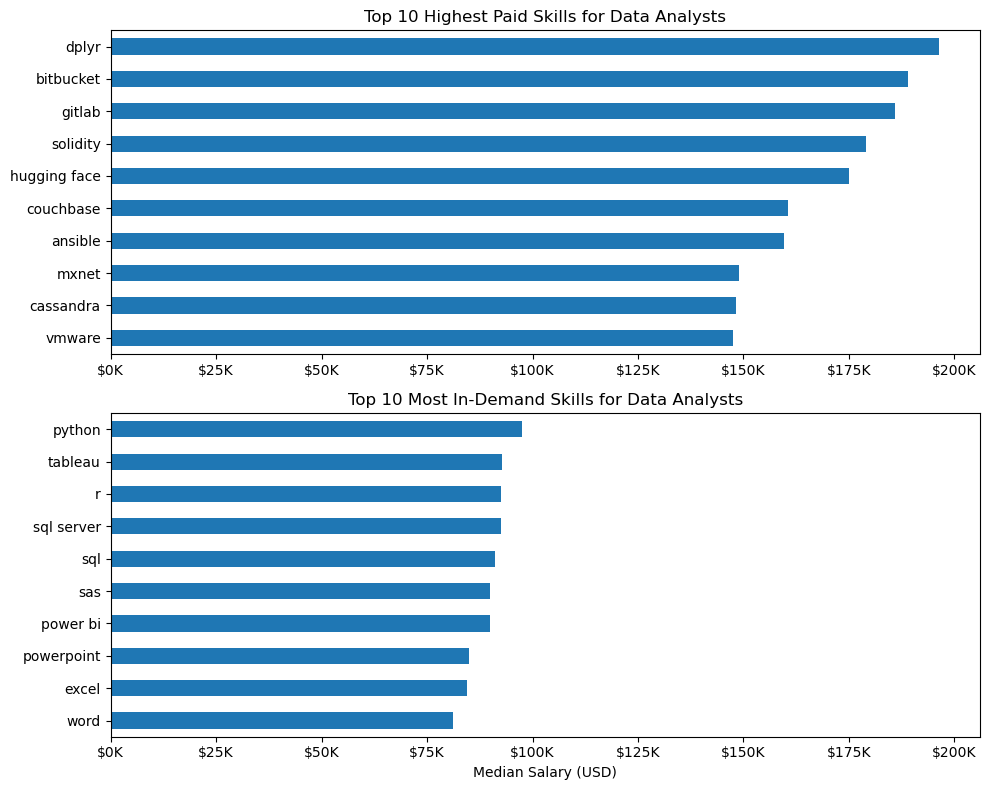

In [3]:
# Filter Data Analyst jobs in the US
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States')
].copy()

# Drop missing salaries
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Explode skills list into rows
df_DA_US = df_DA_US.explode('job_skills')

# Top 10 highest paid skills
df_DA_top_pay = (
    df_DA_US
    .groupby('job_skills')['salary_year_avg']
    .agg(['count', 'median'])
    .sort_values(by='median', ascending=False)
    .head(10)
)

# Top 10 most in-demand skills (by count, then median)
df_DA_skills = (
    df_DA_US
    .groupby('job_skills')['salary_year_avg']
    .agg(['count', 'median'])
    .sort_values(by='count', ascending=False)
    .head(10)
    .sort_values(by='median', ascending=False)
)

# Plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
)

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
)

plt.tight_layout()
plt.show()


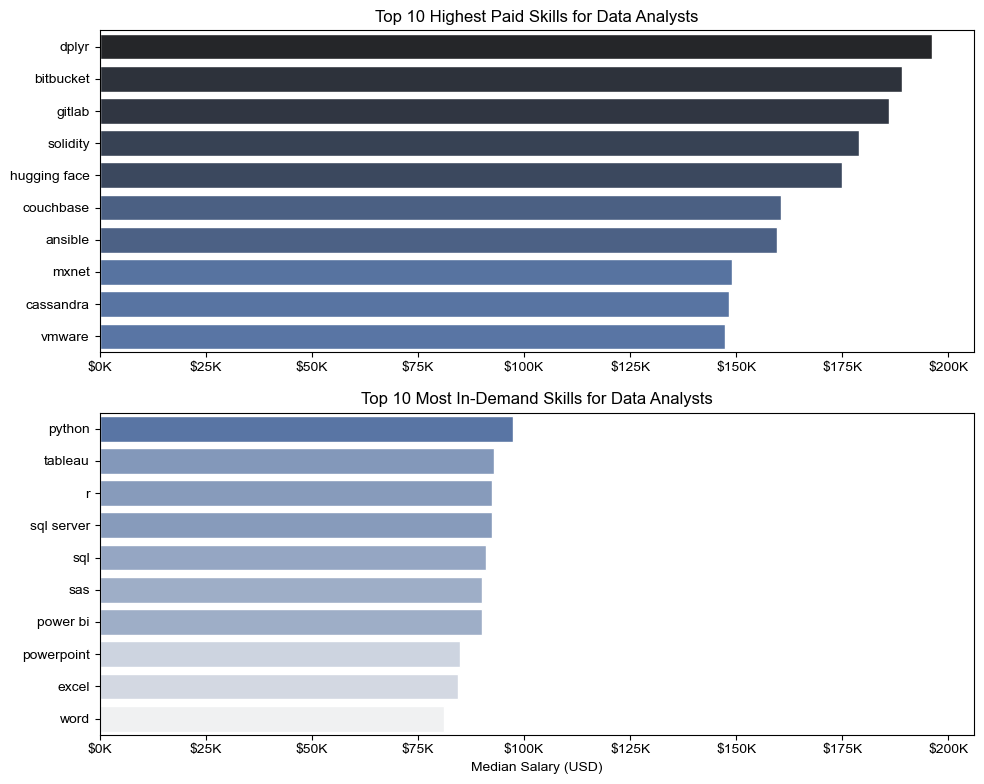

In [4]:
# Plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sns.set_theme(style='ticks')
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median',palette='dark:b_r')
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
)
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median',palette='light:b')
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
)

plt.tight_layout()
plt.show()

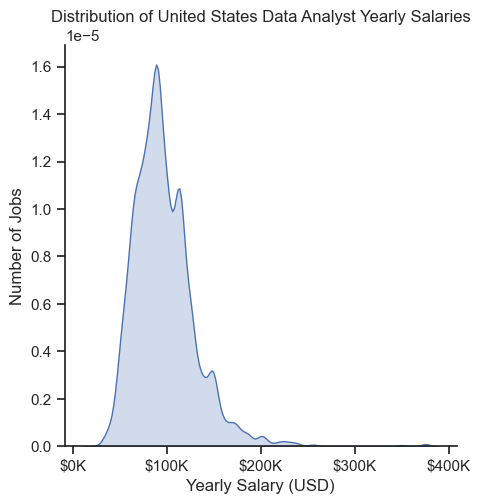

In [5]:
from matplotlib.ticker import FuncFormatter
sns.set_theme(style="ticks")

sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')

ax = plt.gca()
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
)

plt.show()

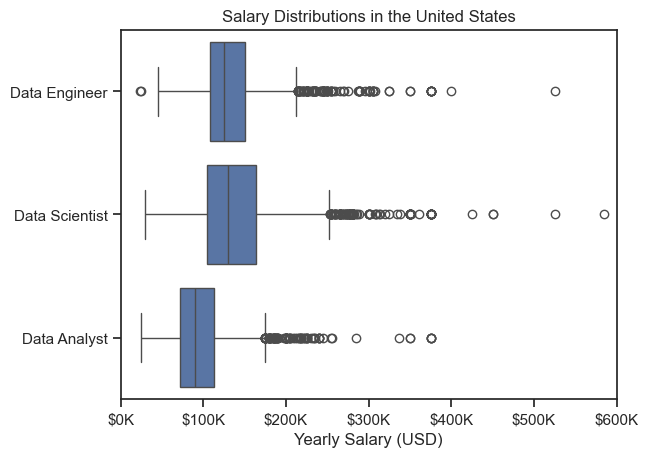

In [7]:
job_titles=['Data Analyst', 'Data Engineer','Data Scientist']
df_US = df[
    (df['job_title_short'].isin(job_titles)) &
    (df['job_country'] == 'United States')
].copy()

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)

plt.gca().xaxis.set_major_formatter(
    FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
)

plt.show()